In [ ]:
import datasets
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()



# Pivot Tables & Trends

1. Job count by country & job title (pivot)

In [ ]:
pivot_job_count = df.pivot_table(
    index='job_title_short',
    columns='job_country',
    values='company_name',   # any column with job records
    aggfunc='count',
    fill_value=0
)

pivot_job_count


job_country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,4,11,21,1,453,29,928,738,16,5,...,984,827,7382,199,55,2,91,3,30,6
Cloud Engineer,0,1,5,0,322,4,489,266,0,2,...,93,193,423,53,3,2,70,0,4,3
Data Analyst,9,36,22,2,1273,33,1658,2169,21,7,...,2587,10482,67816,227,39,16,334,4,40,34
Data Engineer,0,30,21,3,2265,45,4658,2175,7,14,...,1139,11807,35080,248,49,19,768,2,5,11
Data Scientist,1,12,27,1,1617,28,1179,1709,16,5,...,1360,9148,58830,140,50,9,375,0,13,13
Machine Learning Engineer,0,4,2,0,287,22,360,305,2,3,...,164,317,921,46,22,4,115,0,2,1
Senior Data Analyst,2,2,0,0,255,22,310,301,2,1,...,262,1356,11791,50,15,4,71,0,5,1
Senior Data Engineer,0,6,1,0,647,57,1482,542,4,12,...,227,3337,9289,106,54,4,220,0,0,3
Senior Data Scientist,0,11,0,1,350,16,302,451,1,1,...,245,2367,12946,54,19,3,91,0,2,1


2. Avg salary by country & work type

In [ ]:
pivot_avg_salary = df.pivot_table(
    index='job_country', 
    columns='job_work_from_home', 
    values='salary_year_avg',
    aggfunc='mean',
    fill_value=0)
pivot_avg_salary =pivot_avg_salary.astype(int)
pivot_avg_salary

job_work_from_home,False,True
job_country,,
Albania,79472,0
Algeria,44550,0
Argentina,93665,155250
Armenia,84008,52500
Australia,122165,88571
...,...,...
Uruguay,100500,53750
Uzbekistan,0,30750
Vietnam,92584,47000


3. Pivot for job schedule vs salary

In [ ]:
schedule_vs_salary = df.pivot_table(
    index ='job_schedule_type',
    values='salary_year_avg',
    aggfunc='mean')

schedule_vs_salary = schedule_vs_salary.astype(int)
schedule_vs_salary


,salary_year_avg
job_schedule_type,
Contractor,103662
Contractor and Temp work,86471
Full-time,123645
Full-time and Contractor,104875
Full-time and Internship,78722
Full-time and Part-time,143441
Full-time and Per diem,82010
Full-time and Temp work,111187
"Full-time, Contractor, and Internship",65000


4. Trend of jobs per month

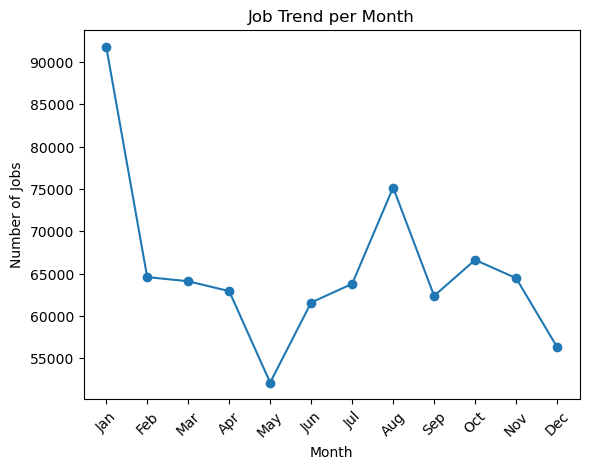

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Extract month name
df['month'] = df['job_posted_date'].dt.strftime('%b') 

jobs_per_month = df.groupby('month').size().reset_index(name='job_count')

# sort by calendar month order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
jobs_per_month['month'] = pd.Categorical(jobs_per_month['month'], categories=month_order, ordered=True)
jobs_per_month = jobs_per_month.sort_values('month')

plt.plot(jobs_per_month['month'], jobs_per_month['job_count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.title('Job Trend per Month')
plt.show()



5. Salary growth trend by job title

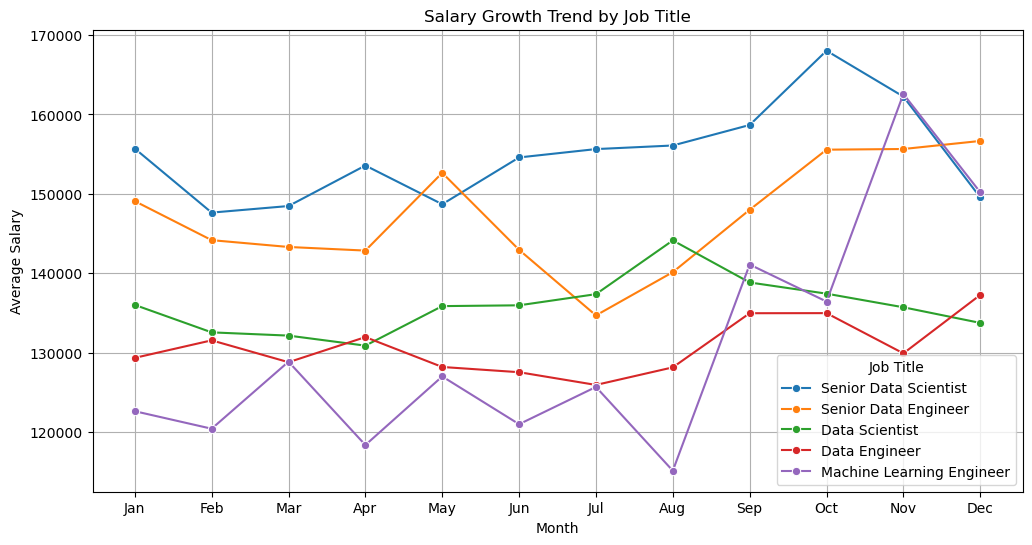

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')


df['year'] = df['job_posted_date'].dt.year
df['month'] = df['job_posted_date'].dt.strftime('%b')
df = df[df['month'].notna()]

df_salary = df[df['salary_year_avg'].notna()]

salary_trend = (df_salary
                .groupby(['job_title_short', 'month'])['salary_year_avg']
                .mean()
                .round()
                .reset_index(name='avg_salary'))

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

salary_trend['month'] = pd.Categorical(
    salary_trend['month'],
    categories=month_order,
    ordered=True
)

salary_trend = salary_trend.sort_values('month')
salary_trend 
top_titles = (
    salary_trend
    .groupby('job_title_short')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
top_titles

trend_top = salary_trend[salary_trend['job_title_short'].isin(top_titles)]
trend_top

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(
    data=trend_top,
    x='month',
    y='avg_salary',
    hue='job_title_short',
    marker='o'
)

plt.title("Salary Growth Trend by Job Title")
plt.xlabel("Month")
plt.ylabel("Average Salary")
plt.grid(True)
plt.legend(title='Job Title')

plt.show()

